In [7]:
# %%
#Boston Housing data    


# %%
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np


In [8]:

# %%
boston = load_boston()

In [9]:
# %%
boston = load_boston()

X = boston.data
y = boston.target



In [10]:
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
u = np.mean(X, axis=0)
std = np.std(X, axis=0)

print(u.shape, std.shape)


(13,) (13,)


In [12]:
#Normalized dataset

X = (X-u)/std

pd.DataFrame(X[:5, :]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


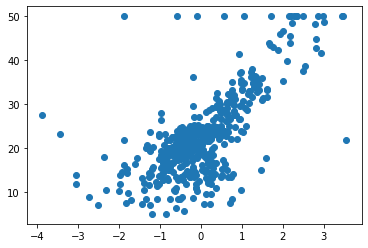

In [13]:
# plot Y vs any features
import matplotlib.pyplot as plt
plt.scatter(X[:, 5], y)
plt.show()

In [14]:
# Linear Regression on Multiple Features
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones,X))
X.shape

(506, 14)

In [21]:
# x - Vector (singlr Example with n features)
# X- matrix
def hypothesis(x, theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_ += (theta[i]*x[i])
    return y_

def error(X,y, theta):
    e = 0.0
    m = X.shape[0]

    for i in range(m):
        y_ = hypothesis(X[i], theta)
        e += (y[i] - y_)**2

    
    return e/m

def gradient(X,y, theta):
    m,n = X.shape
    grad = np.zeros((n,))
 
    for j in range(n):
        #sum over all example 
        for i in range(m):
            y_ = hypothesis(X[i], theta)           
            grad[j] += (y_ - y[i])*X[i][j]

    # Out of the loops
    return grad/m

      
def gradient_descent(X, y, lr= 0.1, max_epochs = 300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_epochs):
        # Calculating Error

        e = error(X, y, theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X, y, theta)
        
        for j in range(n):
            theta[j] = (theta[j] - (lr*grad[j]))

    return theta, error_list



In [22]:
import time 
start = time.time()
theta, error_list = gradient_descent(X, y)
end = time.time()

print("Time Taken is", end - start)# Algorithm is qiuite slow for jsut 506 examples

Time Taken is 14.157723665237427


In [24]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


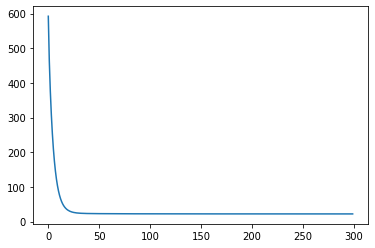

In [25]:
plt.plot(error_list)

plt.show()

In [26]:
y_ = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i], theta)
    y_.append(pred)
y_ = np.array(y_)


In [27]:
# Accuracy Test Function

def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)

    score = 1 - (num/denom)
    
    return score*100

In [28]:
r2_score(y, y_)

74.04541323942743

In [29]:
# Optimizing the algorithm 

In [30]:
def hypothesis2(X, theta):
    return np.dot(X, theta)

def error2(X, y, theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis2(X, theta)
    e = np.sum((y-y_)**2)

    return e/m

def gradient2(X, y, theta):
    y_ = hypothesis2(X, theta)
    grad = np.dot(X.T, (y_ - y))
    m = X.shape[0]

    return grad/m

def gradient_descent2(X, y, lr = 0.1, max_iters = 300):
    n = X.shape[1]  
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error2(X,y, theta)
        error_list.append(e)

        grad = gradient2(X, y, theta)
        theta = theta -lr*grad

    return theta, error_list


In [36]:
start = time.time()
theta2, error_list2 = gradient_descent2(X, y)
end = time.time()
print("Time Taken", end-start)

Time Taken 0.016210079193115234


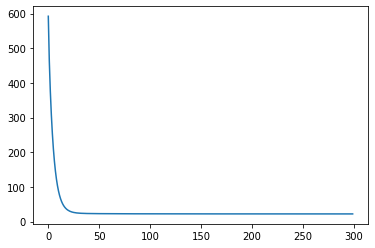

In [37]:
plt.plot(error_list2)
plt.show()

In [38]:
theta2

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

In [39]:
y_ = hypothesis2(X, theta)
r2_score(y, y_)

74.04541323942743